In [2]:
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('pmbot.csv')
df.head()

,project_stream,priority,assigned_date,duration
0,Product Roadmap,High,28-04-2023,14
1,Content Marketing,Medium,27-04-2023,10
2,Data Visualization,Low,26-04-2023,5
3,Cloud Infrastructure,High,25-04-2023,20
4,Process Automation,Medium,24-04-2023,8


In [4]:
df=df[['project_stream','priority']]
df.head()

,project_stream,priority
0,Product Roadmap,High
1,Content Marketing,Medium
2,Data Visualization,Low
3,Cloud Infrastructure,High
4,Process Automation,Medium


In [5]:
import string
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords

In [6]:
def sent_tokens_func(text):
  return nltk.sent_tokenize(text)

def word_tokens_func(text):
  return nltk.word_tokenize(text)  

def to_lower(text):
  if not isinstance(text,str):
    text = str(text)
  return text.lower()

def number_omit_func(text):
  output = ''.join(c for c in text if not c.isdigit())
  return output

def remove_punctuation(text):
  return ''.join(c for c in text if c not in punctuation) 

def stopword_remove_func(sentence):
  stop_words = stopwords.words('english')
  return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

def lemmatize(text):
          wordnet_lemmatizer = WordNetLemmatizer()
          lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
          return " ".join(lemmatized_word)

def preprocess(text):
        lower_text = to_lower(text)
        sentence_tokens = sent_tokens_func(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = number_omit_func(lemmatizzed_sent)
            clean_text = remove_punctuation(clean_text)
            clean_text = stopword_remove_func(clean_text)
            word_tokens = word_tokens_func(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return " ".join(word_list)

In [7]:
df.isnull().sum()

project_stream    0
priority          0
dtype: int64

In [8]:
df['project_stream']=df['project_stream'].apply(preprocess)

In [9]:
df.head(10)

,project_stream,priority
0,product roadmap,High
1,content marketing,Medium
2,data visualization,Low
3,cloud infrastructure,High
4,process automation,Medium
5,brand strategy,Low
6,customer survey,High
7,market segmentation,Medium
8,network monitoring,Low
9,user research,High


In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()

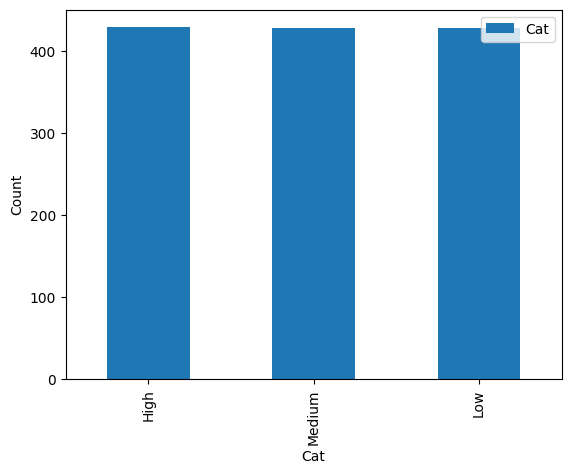

In [11]:
df['priority'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Cat')
plt.legend(['Cat','Count'])
plt.show()

In [12]:
df['priority'].value_counts()

High      429
Medium    428
Low       428
Name: priority, dtype: int64

In [13]:
df['priority']=le.fit_transform(df['priority'])

In [14]:
df.head(10)

,project_stream,priority
0,product roadmap,0
1,content marketing,2
2,data visualization,1
3,cloud infrastructure,0
4,process automation,2
5,brand strategy,1
6,customer survey,0
7,market segmentation,2
8,network monitoring,1
9,user research,0


In [15]:
df['priority'].unique()

array([0, 2, 1])

In [16]:
df['priority'].value_counts()

0    429
2    428
1    428
Name: priority, dtype: int64

In [17]:
df.head()

,project_stream,priority
0,product roadmap,0
1,content marketing,2
2,data visualization,1
3,cloud infrastructure,0
4,process automation,2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['project_stream'], df['priority'], test_size=0.2, random_state=42)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [22]:
import joblib
joblib.dump(vectorizer,'vect.joblib')

['vect.joblib']

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 75.09727626459144


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy*100

78.21011673151752

In [29]:
s=input()
s=preprocess(s)
print(s)
s=vectorizer.transform([s])
# Make predictions
predictions = model.predict(s)
if predictions==[0]:
    print('High')
elif predictions==[1]:
    print('Low')
else:
    print('Medium')
print(predictions)

product managemment
High
[0]


In [37]:
s=input()
s=preprocess(s)
print(s)
s=vectorizer.transform([s])
# Make predictions
predictions = rf_classifier.predict(s)
if predictions==[0]:
    print('High')
elif predictions==[1]:
    print('Low')
else:
    print('Medium')
print(predictions)

infrastructure management
Low
[1]
